Epoch 1/10, Train Loss: 1.1681438188552857, Val Loss: 0.6415425402686951, Train accuracy: 0.6162, Test accuracy: 0.8038
Epoch 2/10, Train Loss: 0.5673870652516683, Val Loss: 0.5204957672890197, Train accuracy: 0.8312, Test accuracy: 0.8422
Epoch 3/10, Train Loss: 0.4944483592510223, Val Loss: 0.4791887177431837, Train accuracy: 0.8534, Test accuracy: 0.8579
Epoch 4/10, Train Loss: 0.46350097433725995, Val Loss: 0.4576871708986607, Train accuracy: 0.8626, Test accuracy: 0.8672
Epoch 5/10, Train Loss: 0.44488104490439095, Val Loss: 0.4429297593045742, Train accuracy: 0.8680, Test accuracy: 0.8715
Epoch 6/10, Train Loss: 0.43518547745545705, Val Loss: 0.4386121942958933, Train accuracy: 0.8707, Test accuracy: 0.8736
Epoch 7/10, Train Loss: 0.4259426025946935, Val Loss: 0.4284338798928768, Train accuracy: 0.8742, Test accuracy: 0.8788
Epoch 8/10, Train Loss: 0.4199903400739034, Val Loss: 0.430479146381642, Train accuracy: 0.8769, Test accuracy: 0.8787
Epoch 9/10, Train Loss: 0.414481670022

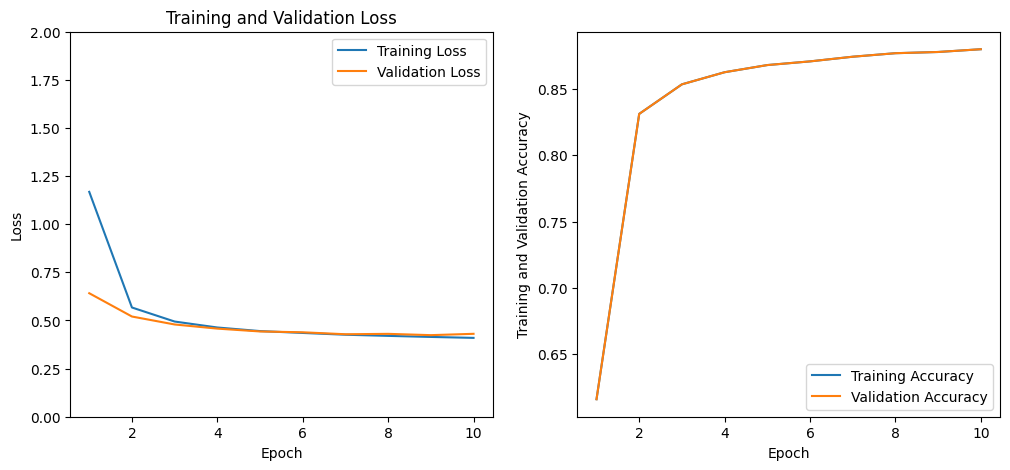

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameters
input_size = 28*28          # img_size = (28,28) ---> 28*28=784 in total
num_classes = 10            # number of output classes discrete range [0,9]
hidden_size = [10]     # number of neurons at hidden layer
num_epochs = 10
batch_size = 128
lr = 1e-3

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple neural network model
class FCNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FCNN, self).__init__()
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        layers = []
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            if i < len(layer_sizes) - 2:
                layers.append(nn.ReLU())  # Using ReLU activation function
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

# Create a model
model = FCNN(input_size, hidden_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)
    train_acc = train_correct / train_total
    train_accs.append(train_acc)

    model.eval()
    running_val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = running_val_loss / len(val_loader)
    val_losses.append(val_loss)
    val_acc = val_correct / val_total
    val_accs.append(train_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss}, Val Loss: {val_loss}, Train accuracy: {train_acc:.4f}, Val accuracy: {val_acc:.4f}')

# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accs, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Accuracy')
plt.legend()

plt.show()